In [1]:
import requests

In [2]:
url = "https://www.starbucks.co.kr/store/getStore.do?r=0TBTNRUD42"

In [3]:
head = {"User-Agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/94.0.4606.71 Safari/537.36"}

In [4]:
payload = {"in_biz_cds" : "0",
"in_scodes" : "0",
"ins_lat" : "37.5001823",
"ins_lng" : "127.0078127",
"search_text" : "",
"p_sido_cd" : "01",
"p_gugun_cd" : "",
"in_distance" : "0",
"in_biz_cd" : "",
"isError" : "true",
"searchType" : "C",
"set_date" : "",
"all_store" : "0",
"T03" : "0",
"T01" : "0",
"T27" : "0",
"T12" : "0",
"T09" : "0",
"T30" : "0",
"T05" : "0",
"T22" : "0",
"T21" : "0",
"T10" : "0",
"T36" : "0",
"T43" : "0",
"T48" : "0",
"P10" : "0",
"P50" : "0",
"P20" : "0",
"P60" : "0",
"P30" : "0",
"P70" : "0",
"P40" : "0",
"P80" : "0",
"whcroad_yn" : "0",
"P90" : "0",
"new_bool" : "0",
"iend" : "1000",
"rndCod" : "KSBBBU69W9"}

In [5]:
r = requests.post(url, headers=head, data=payload)

In [6]:
r.json()['list'].__len__()

566

In [7]:
import pandas as pd
seoul_star = pd.DataFrame(r.json()['list'])

In [8]:
for x in seoul_star.iloc[0]:
    print(x, end=', ')

0, None, None, None, None, None, None, None, None, None, None, None, 0, None, , , None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, 1509, 역삼아레나빌딩, 1522-3232, 02-568-3763, 01, 서울, 0101, 강남구, 서울특별시 강남구 역삼동 721-13 아레나빌딩, None, None, T05@T08@T16@T17@T20@T21@T30@T36@T52@P80@P90, 0, , , , 0, 3.11, -1, -1, -1, 30, , 0, 3762, N, , 0, None, None, /upload/store/2020/09/[3762]_20200917031519_6juwr.JPG, None, None, None, None, None, 0, None, None, 0, None, None, None, None, None, None, , 1, 60, 20190613, 0, , , , , , 서울특별시 강남구 언주로 425 (역삼동), , N, WHCROAD, , , , 0, None, A01, None, None, 37.501087, 127.043069, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 

In [9]:
import numpy as np

In [10]:
seoul_star.isnull().sum()

seq           0
sido_cd     566
sido_nm     566
gugun_cd    566
gugun_nm    566
           ... 
t36           0
t27           0
t29           0
t43           0
t48           0
Length: 129, dtype: int64

In [11]:
seoul_star.replace(0, np.NAN, inplace=True)
seoul_star.replace('', np.NAN, inplace=True)
seoul_star.dropna(axis=1, inplace=True)

In [12]:
seoul_star.head(1)

,s_code,s_name,tel,fax,sido_code,sido_name,gugun_code,gugun_name,addr,theme_state,...,new_icon,defaultimage,istart,iend,open_dt,doro_address,my_siren_order_store_yn,store_area_code,lat,lot
0,1509,역삼아레나빌딩,1522-3232,02-568-3763,01,서울,0101,강남구,서울특별시 강남구 역삼동 721-13 아레나빌딩,T05@T08@T16@T17@T20@T21@T30@T36@T52@P80@P90,...,N,/upload/store/2020/09/[3762]_20200917031519_6j...,1,60,20190613,서울특별시 강남구 언주로 425 (역삼동),N,A01,37.501087,127.043069


In [66]:
# a = seoul_star.where(seoul_star != '', None)
# a.dropna(axis=1, inplace=True)

In [13]:
# s_name, gugun_name, addr, defaultimage, doro_address, open_dt, lat, lot
seoul_star.iloc[0, :]

s_code                                                                  1509
s_name                                                               역삼아레나빌딩
tel                                                                1522-3232
fax                                                              02-568-3763
sido_code                                                                 01
sido_name                                                                 서울
gugun_code                                                              0101
gugun_name                                                               강남구
addr                                              서울특별시 강남구 역삼동 721-13 아레나빌딩
theme_state                      T05@T08@T16@T17@T20@T21@T30@T36@T52@P80@P90
out_distance                                                            3.11
all_search_cnt                                                            -1
addr_search_cnt                                                           -1

In [14]:
target_col = ["s_name", "gugun_name", "addr", "defaultimage", "doro_address", "open_dt", "lat", "lot"]

In [15]:
seoul_star = seoul_star[target_col]

In [78]:
# 가장 오래된 스타벅스, 가장 최근에 오픈한 스타벅스, 스타벅스 오픈 월별 추이
seoul_star

,s_name,gugun_name,addr,defaultimage,doro_address,open_dt,lat,lot
0,역삼아레나빌딩,강남구,서울특별시 강남구 역삼동 721-13 아레나빌딩,/upload/store/2020/09/[3762]_20200917031519_6j...,서울특별시 강남구 언주로 425 (역삼동),20190613,37.501087,127.043069
1,논현역사거리,강남구,서울특별시 강남구 논현동 142-2 정일빌딩,/upload/store/2018/12/[3672]_20181211120009_t9...,서울특별시 강남구 강남대로 538 (논현동),20181123,37.510178,127.022223
2,신사역성일빌딩,강남구,서울특별시 강남구 논현동 18-4 성일빌딩,/upload/store/2019/12/[3858]_20191218124337_c8...,서울특별시 강남구 강남대로 584 (논현동),20191219,37.514132,127.020563
3,국기원사거리,강남구,서울특별시 강남구 역삼동 648-22 동찬빌딩,/upload/store/2019/07/[3669]_20190730073527_5n...,서울특별시 강남구 테헤란로 125 (역삼동),20190731,37.499517,127.031495
4,스탈릿대치R,강남구,서울특별시 강남구 대치동 599 대원빌딩,/upload/store/2019/02/[3703]_20190215093408_m3...,서울특별시 강남구 남부순환로 2947 (대치동),20190214,37.494668,127.062583
...,...,...,...,...,...,...,...,...
561,사가정역,중랑구,서울특별시 중랑구 면목동 617-2,/upload/store/2015/07/[3023]_20150730100354230...,서울특별시 중랑구 면목로 310,20141002,37.579594,127.087966
562,상봉역,중랑구,"서울특별시 중랑구 상봉동 100-2,3,4번지",/upload/store/2019/10/[9686]_20191001110003_28...,서울특별시 중랑구 망우로 307 (상봉동),20120323,37.59689,127.08647
563,묵동이마트,중랑구,서울특별시 중랑구 묵동 170-1 묵동자이아파트 (묵동이마트 B1층),/upload/store/2019/01/[9570]_20190110064916_t8...,"서울특별시 중랑구 동일로 932 (묵동, 묵동자이아파트) (묵동이마트 B1층)",20110121,37.613433,127.077484
564,묵동,중랑구,서울특별시 중랑구 묵동 169-12 1층,/upload/store/2020/06/[3936]_20200628090702_8k...,서울특별시 중랑구 동일로 952,20200630,37.615368,127.076633


In [82]:
seoul_star.sort_values(by=['open_dt'])

,s_name,gugun_name,addr,defaultimage,doro_address,open_dt,lat,lot
222,이대R,서대문구,서울특별시 서대문구 대현동 54-4,/upload/store/2019/07/[9100]_20190724082658_ax...,서울특별시 서대문구 이화여대길 34 (대현동),19990727,37.55848315,126.9459643
368,여의도,영등포구,서울특별시 영등포구 여의도동 23-9,/upload/store/2021/06/[9160]_20210603042849_0k...,서울특별시 영등포구 국제금융로2길 28 (여의도동),20001009,37.52403519,126.9245179
48,압구정역,강남구,서울특별시 강남구 신사동 580-2 관영빌딩 1층 지하1층,/upload/store/2020/07/[9213]_20200703054403_kh...,"서울특별시 강남구 압구정로 170, 관영빌딩 1층 지하1층 (신사동)",20010310,37.52674095,127.0281105
532,한양대,성동구,"서울특별시 성동구 행당동 31-11 경희빌딩 1,2층",/upload/store/2017/07/[9215]_20170730042059_m3...,"서울특별시 성동구 왕십리로 225 (행당동) 1,2층",20010420,37.55726984,127.0421649
410,인사,종로구,서울특별시 종로구 인사동 39,/upload/store/2018/06/[9222]_20180615020701_pl...,서울특별시 종로구 인사동길 14 (인사동),20010810,37.5721293,126.98703490000002
...,...,...,...,...,...,...,...,...
535,옥수,성동구,서울특별시 성동구 옥수동 262-1,/upload/store/2021/09/[4136]_20210901053042_ky...,서울특별시 성동구 독서당로 202 (옥수동),20210902,37.5430298,127.0133661
514,구로고척,구로구,서울특별시 구로구 고척동 72-59 외 6필지,/upload/store/2021/09/[3994]_20210914024946_ei...,서울특별시 구로구 경인로 387 (고척동),20210909,37.49706,126.86315
326,송파KT,송파구,"서울특별시 송파구 신천동 29-1, 오피스빌딩 1층 2~4호",/upload/store/2021/09/[4139]_20210910080523_j4...,"서울특별시 송파구 잠실로 209 (신천동), 오피스빌딩 1층 2~4호",20210910,37.5139991,127.1063026
111,강서NC,강서구,"서울특별시 강서구 등촌동 689 엔씨백화점 1F, 일부",/upload/store/2021/09/[4122]_20210913032029_pw...,서울특별시 강서구 강서로56길 17 (등촌동),20210915,37.560088,126.840534


In [80]:
# 가장 오래된 스타벅스
seoul_star.sort_values(by=['open_dt']).iloc[0]

s_name                                                        이대R
gugun_name                                                   서대문구
addr                                          서울특별시 서대문구 대현동 54-4
defaultimage    /upload/store/2019/07/[9100]_20190724082658_ax...
doro_address                            서울특별시 서대문구 이화여대길 34 (대현동)
open_dt                                                  19990727
lat                                                   37.55848315
lot                                                   126.9459643
Name: 222, dtype: object

In [81]:
# 가장 최근에 오픈한 스타벅스
seoul_star.sort_values(by=['open_dt']).iloc[-1]

s_name                                                     수서역사거리
gugun_name                                                    강남구
addr                                   서울특별시 강남구 수서동 724 로즈데일오피스텔
defaultimage    /upload/store/2021/09/[4153]_20210929104219_e5...
doro_address                              서울특별시 강남구 광평로 280 (수서동)
open_dt                                                  20210929
lat                                              37.4873267937748
lot                                              127.103140081887
Name: 78, dtype: object

In [120]:
from datetime import datetime
# 스타벅스 오픈 월별 추이
seoul_star['open_year'] = pd.to_datetime(seoul_star['open_dt']).dt.year
seoul_star['open_month'] = pd.to_datetime(seoul_star['open_dt']).dt.month
tmp = seoul_star.groupby(by=['open_year', 'open_month'])[['s_name']].count().reset_index()

In [122]:
tmp

,open_year,open_month,s_name
0,1999,7,1
1,2000,10,1
2,2001,3,1
3,2001,4,1
4,2001,8,1
...,...,...,...
194,2021,5,3
195,2021,6,3
196,2021,7,5
197,2021,8,5


<AxesSubplot:ylabel='s_name'>

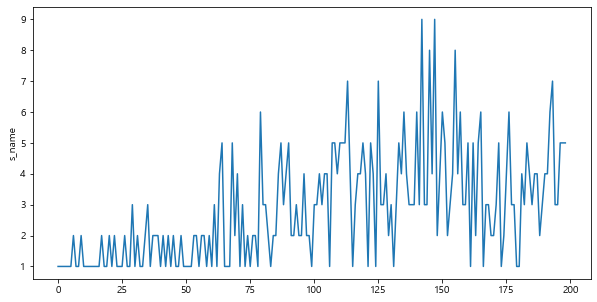

In [138]:
import matplotlib.pyplot as plt
import seaborn as sns 

plt.rc("font", family="Malgun Gothic")
plt.rc("axes", unicode_minus=False)
plt.figure(figsize=(10, 5))
#plt.xlabel("dmfa")
#plt.ylabel('매장 수')
sns.lineplot(data= tmp['s_name'])

In [102]:
# 스타벅스 리저브 매장만 보기
payload['T03'] = 1
r2 = requests.post(url, headers=head, data=payload)
r2.json()['list'].__len__()
pd.DataFrame(r2.json()['list'])[target_col]

,s_name,gugun_name,addr,defaultimage,doro_address,open_dt,lat,lot
0,스탈릿대치R,강남구,서울특별시 강남구 대치동 599 대원빌딩,/upload/store/2019/02/[3703]_20190215093408_m3...,서울특별시 강남구 남부순환로 2947 (대치동),20190214,37.494668,127.062583
1,삼성역섬유센터R,강남구,서울특별시 강남구 대치동 944-31 한국섬유산업연합회,/upload/store/2019/04/[3648]_20190416114636_1v...,서울특별시 강남구 테헤란로 518 (대치동),20181123,37.507750,127.060651
2,압구정R,강남구,서울특별시 강남구 신사동 621-1,/upload/store/2019/11/[3623]_20191125073032_ua...,서울특별시 강남구 언주로 861 (신사동),20180831,37.5273669,127.033061
3,수서역R,강남구,서울특별시 강남구 수서동 715 수서빌딩,/upload/store/2018/06/[3588]_20180625121751_b9...,서울특별시 강남구 광평로 281 (수서동),20180627,37.488008,127.102650
4,양재강남빌딩R,강남구,서울특별시 강남구 도곡동 956 LG전자 강남R&D센터,/upload/store/2020/07/[3604]_20200703010217_yq...,서울특별시 강남구 남부순환로 2621 (도곡동),20180824,37.485192,127.036685
5,선릉동신빌딩R,강남구,서울특별시 강남구 삼성동 141-28 동신빌딩,/upload/store/2018/03/[3562]_20180326063222_r2...,서울특별시 강남구 테헤란로 409 (삼성동),20180330,37.505321,127.050409
6,스타필드코엑스몰R,강남구,서울특별시 강남구 삼성동 159 코엑스 A106호,/upload/store/2018/02/[3467]_20180226085535_li...,서울특별시 강남구 영동대로 513 (삼성동) 코엑스 A106호,20170502,37.50999,127.061455
7,강남R,강남구,서울특별시 강남구 역삼동 825 미진프라자 1층 101호,/upload/store/2017/08/[3478]_20170822020135_a2...,서울특별시 강남구 강남대로 390 (역삼동),20170816,37.497711,127.028439
8,청담스타R,강남구,서울특별시 강남구 청담동 89-4,/upload/store/2020/09/[3366]_20200919014258_y0...,서울특별시 강남구 도산대로57길 24 (청담동),20161214,37.525216,127.041827
9,SSG마켓도곡R,강남구,서울특별시 강남구 도곡동 467-17 타워팰리스Ⅱ F 지하1층,/upload/store/2018/12/[9260]_20181207061914_j5...,"서울특별시 강남구 언주로30길 57, 타워팰리스Ⅱ F 지하1층 (도곡동)",20030115,37.490298,127.054895


In [139]:
seoul_star.iloc[0, 3]

'/upload/store/2020/09/[3762]_20200917031519_6juwr.JPG'

#### starbucks_images 폴더 생성 후 사진 저장
#### 사진 저장 이름 : 매장이름.jpg

In [159]:
import os
try: 
    if not os.path.exists("starbucks_images"): 
        os.makedirs("starbucks_images") 
except OSError: 
    print("Error: Failed to create the directory.")

url = "http://starbucks.co.kr{}"

for idx, x in enumerate(seoul_star['defaultimage']):
    r = requests.get(url.format(x)) 
    file = open('starbucks_images/{}.jpg'.format(seoul_star.iloc[idx]['s_name']),"wb")
    file.write(r.content)
    file.close()

In [ ]:
# if not os.path.exists("starbucks_images"):
#     os.mkdir("starbucks_images")
    
# url = "http://starbucks.co.kr{}"
# for idx, data in seoul_star[['s_name', 'defaultimage']].iterrows():
#     s_name, image_url = data
#     r = requests.get(url.format(x))
#     with open(f"./starbucks_images/{s_name}.jpg", "wb") as f:
#         f.write(r.content)

In [165]:
pip install folium

Note: you may need to restart the kernel to use updated packages.


In [17]:
import folium

In [18]:
seoul_map = folium.Map(location=[37.55,126.98], zoom_start=12)
seoul_map

In [178]:
folium.Marker([37.616738556389144, 126.92820224008295], popup="내가 있는 곳").add_to(seoul_map)
folium.Marker([37.490820774561264, 127.01047728240813], popup="엔코아").add_to(seoul_map)
folium.Marker([37.507745, 127.030716], popup="박재균").add_to(seoul_map)
folium.Marker([37.274140728831185, 127.15196988321867], popup="전용우").add_to(seoul_map)
folium.Marker([37.75035064273311, 127.07461309891103], popup='배혜주').add_to(seoul_map)
folium.Marker([37.63986588562293, 127.02552376254062], popup='이원호').add_to(seoul_map)
seoul_map

In [181]:
seoul_map = folium.Map(location=[37.55,126.98], zoom_start=12)

# 스타벅스 마커 만들기
for name, lat, lot in seoul_star[['s_name', 'lat', 'lot']].values:
    folium.Marker([lat, lot], popup=name).add_to(seoul_map)
seoul_map

In [21]:
import selenium
from selenium import webdriver
from bs4 import BeautifulSoup as BS

#### headless 설정

In [22]:
options = webdriver.ChromeOptions()
options.add_argument('--headless')

In [26]:
driver = webdriver.Chrome(executable_path="./chromedriver.exe", options=options)
#driver2 = webdriver.Chrome(executable_path="./chromedriver.exe")

In [27]:
selenium_url = "https://www.starbucks.co.kr/store/store_map.do"

In [28]:
driver.get(selenium_url)

In [29]:
bs = BS(driver.page_source, 'lxml')

In [36]:
payload = {"in_biz_cds" : "0",
"in_scodes" : "0",
"ins_lat" : "37.5001823",
"ins_lng" : "127.0078127",
"search_text" : "",
"p_sido_cd" : "01",
"p_gugun_cd" : "",
"in_distance" : "0",
"in_biz_cd" : "",
"isError" : "true",
"searchType" : "C",
"set_date" : "",
"all_store" : "0",
"T03" : "0",
"T01" : "0",
"T27" : "0",
"T12" : "0",
"T09" : "0",
"T30" : "0",
"T05" : "0",
"T22" : "0",
"T21" : "0",
"T10" : "0",
"T36" : "0",
"T43" : "0",
"T48" : "0",
"P10" : "0",
"P50" : "0",
"P20" : "0",
"P60" : "0",
"P30" : "0",
"P70" : "0",
"P40" : "0",
"P80" : "0",
"whcroad_yn" : "0",
"P90" : "0",
"new_bool" : "0",
"iend" : "1000",
"rndCod" : "KSBBBU69W9"}

In [37]:
sido = [x['data-sidocd'] for x in bs.find("ul", class_="sido_arae_box").findAll('a')]

In [38]:
sido

[]

In [32]:
for i in sido:
    r = requests.post(url, headers=head, data=payload)
    r.json()['list']
    seoul_star = pd.DataFrame(r.json()['list'])
    for name, lat, lot in seoul_star[['s_name', 'lat', 'lot']].values:
        folium.Marker([lat, lot], popup=name).add_to(seoul_map)

In [33]:
seoul_map

### 서울시 대상으로 지역구별 스타벅스 개수

In [43]:
#seoul_star.groupby('gugun_name')['s_name'].count()
starbucks_gu = seoul_star.groupby('gugun_name').size()

In [44]:
starbucks_gu

gugun_name
강남구     87
강동구     16
강북구      6
강서구     21
관악구     11
광진구     17
구로구     12
금천구     11
노원구     13
도봉구      3
동대문구     9
동작구     11
마포구     32
서대문구    20
서초구     48
성동구     12
성북구     14
송파구     34
양천구     17
영등포구    39
용산구     21
은평구      8
종로구     40
중구      56
중랑구      8
dtype: int64

In [ ]:
# import pickle

# with open("./star_gu.pkl", "wb") as f:
#     pickle.dump(starbucks_gu, f)
    
# with open("./star_gu.pkl", "rb") as f:
#     starbucks_gu = pickle.load(f)

In [45]:
import json

In [47]:
df = pd.read_excel("./datasets/경기도인구데이터.xlsx", index_col='구분', engine='openpyxl')

In [52]:
df.columns = df.columns.map(str)

In [56]:
df.head(1)

,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
구분,,,,,,,,,,,
수원시장안구,287474,285803,290798,293692,290999,291757,300908,301196,299016,296479,293828


In [61]:
geo_data = json.load(open ("./datasets/경기도행정구역경계.json", encoding='utf-8'), encoding='utf8')

In [64]:
year = '2017'
g_map = folium.Map(location=[37.5502,126.982], 
                   tiles='Stamen Terrain', zoom_start=9)
folium.Choropleth(geo_data=geo_data,    # 지도 경계
                 data = df[year],      # 표시하려는 데이터
                 columns = [df.index, df[year]],  # 열 지정
                 fill_color='YlOrRd', fill_opacity=0.7, line_opacity=0.3,
                 threshold_scale=[10000, 100000, 300000, 500000, 700000],               
                 key_on='feature.properties.name',
                 ).add_to(g_map)

In [65]:
g_map